In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from os import path
import dateutil.parser as dt
import seaborn as sns
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import datetime 

# Load the Data

In [ ]:
train = pd.read_csv('train_post4.csv')

In [ ]:
train = train.drop('Unnamed: 0', axis=1)

In [ ]:
train = pd.read_csv('train.csv')

### Initial exploration

In [25]:
def add_freq():
    ncount = len(train)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,45)

    ax2.grid(None)

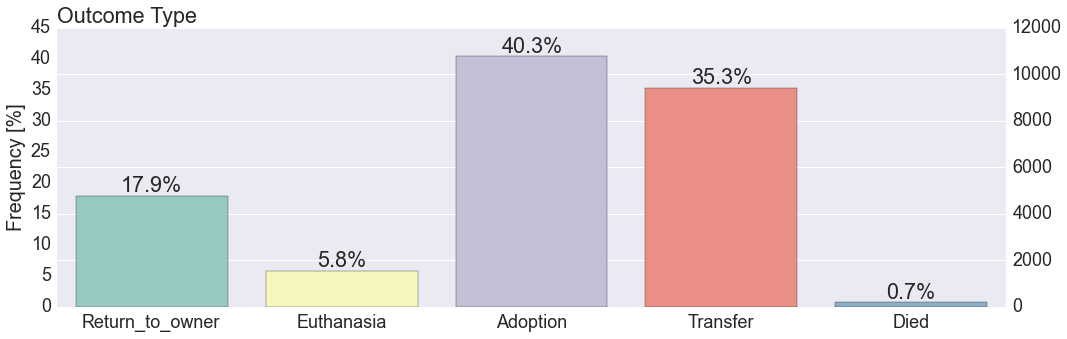

In [26]:
sns.set(font_scale=1.8)
ax = sns.countplot('OutcomeType', data = train ,palette="Set3")
plt.title('Outcome Type', loc='left')
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(17,5)

add_freq()

plt.show()

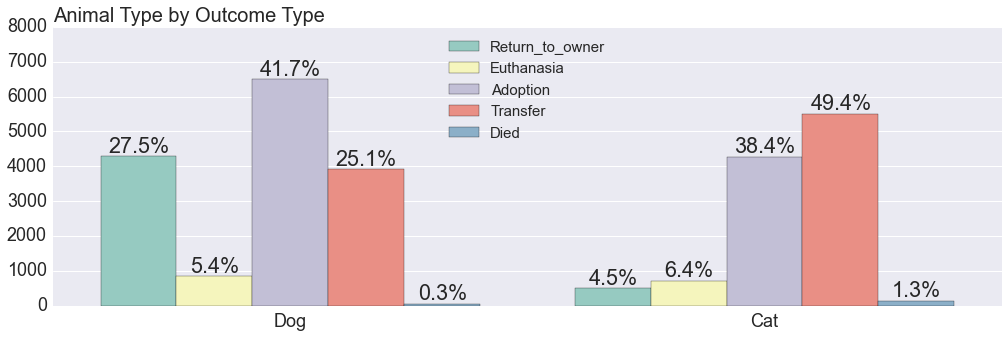

In [27]:
sns.set(font_scale=1.8)
ax = sns.countplot('AnimalType', data = train, hue = 'OutcomeType', palette='Set3')
fig = plt.gcf()
fig.set_size_inches(17,5)
plt.xlabel('')
plt.ylabel('')
plt.title('Animal Type by Outcome Type', loc='left', fontsize=20)
plt.ylim(top = 8000)
plt.legend(fontsize=15, loc=9)
fig = plt.gcf()
fig.set_size_inches(17,5)

for p in ax.patches[::2]:
    ncount = len(train[(train.AnimalType == 'Dog')])
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

for p in ax.patches[1::2]:
    ncount = len(train[(train.AnimalType == 'Cat')])
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')
    
plt.show()

# Extract the date and time

Extract the year, month, day, and hour to become vars that will later be chacked for predictive power 

In [ ]:
year = list()
month = list()
day = list()
hour = list()

for i in range(train.shape[0]):
    temp = dt.parse(train.DateTime[i])
    year.append(temp.year)
    month.append(temp.month)
    day.append(temp.day)
    hour.append(temp.hour)

train['year'], train['month'], train['day'], train['hour'] = year, month, day, hour

train = train.drop('DateTime', axis=1)

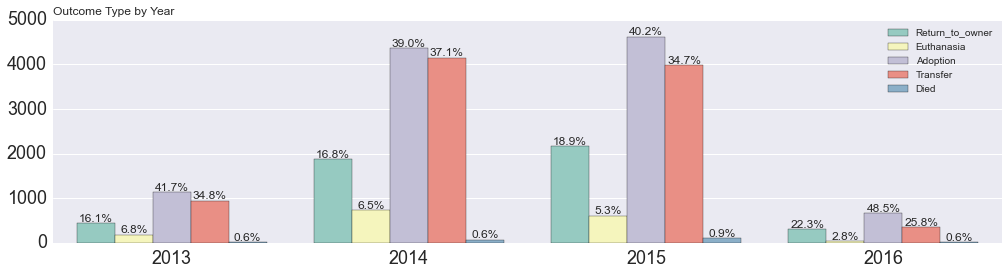

In [29]:
ax = sns.countplot(x = 'year', hue = 'OutcomeType', data = train, palette='Set3')
sns.set(font_scale=1)
fig = plt.gcf()
fig.set_size_inches(17,4)
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.title('Outcome Type by Year', loc='left')

all_trends = list()
for i in range(4):        
    for p in ax.patches[i::4]:
        ncount = len(train[(train.year == 2013+i)])
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')
        all_trends.append(100.*y/ncount)


plt.show()

### Trends by year

C:\Users\dell\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


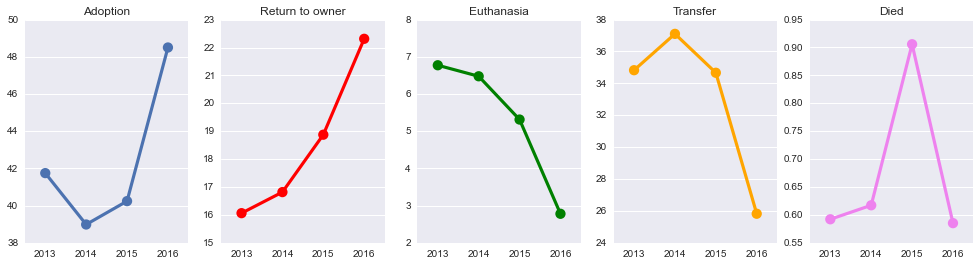

In [30]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharex=False, sharey=False,
                                            squeeze=True, subplot_kw=None, gridspec_kw=None)
fig = plt.gcf()
fig.set_size_inches(17,4)
plt.legend()
trends_df = pd.DataFrame(data={'rto_trend': all_trends[::5],
                                'e_trend': all_trends[1::5],
                                'a_trend': all_trends[2::5],
                                't_trend': all_trends[3::5],
                                'd_trend': all_trends[4::5]}, 
                         index = ['2013', '2014', '2015', '2016'])

                                

a = sns.pointplot(x = trends_df.index, y = 'a_trend', data=trends_df, ax=ax1)
rto = sns.pointplot(x = trends_df.index, y = 'rto_trend', data=trends_df, color = 'red', ax=ax2)
e = sns.pointplot(x = trends_df.index, y = 'e_trend', data=trends_df, color = 'green', ax=ax3)
t = sns.pointplot(x = trends_df.index, y = 't_trend', data=trends_df, color = 'orange', ax=ax4)
d = sns.pointplot(x = trends_df.index, y = 'd_trend', data=trends_df, color = 'violet', ax=ax5)

a.set_title('Adoption')
rto.set_title('Return to owner')
e.set_title('Euthanasia')
t.set_title('Transfer')
d.set_title('Died')

a.set(ylabel='')
rto.set(ylabel='')
e.set(ylabel='')
t.set(ylabel='')
d.set(ylabel='')


plt.show()

### Trends by month 

In [ ]:
ax = sns.countplot(x = 'month', hue = 'OutcomeType', data = train, palette='Set3')
sns.set(font_scale=1)
fig = plt.gcf()
fig.set_size_inches(17,4)
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.title('Outcome Type by month', loc='left')

all_trends_month = list()
for i in range(12):        
    for p in ax.patches[i::12]:
        ncount = len(train[(train.month == 1+i)])
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')
        all_trends_month.append(100.*y/ncount)


plt.show(None)

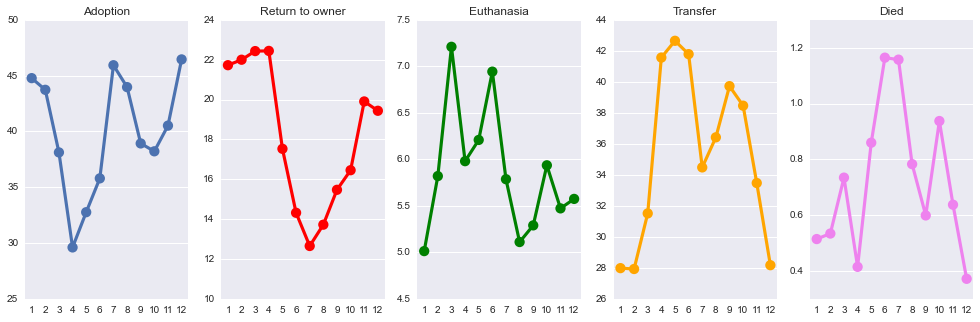

In [32]:
months_choices = []
for i in range(1,13):
    months_choices.append((i, datetime.date(2008, i, 1).strftime('%B')))
    
index = list()
for i in range(len(months_choices)):
    index.append(months_choices[i][1])

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharex=False, sharey=False,
                                            squeeze=True, subplot_kw=None, gridspec_kw=None)
fig = plt.gcf()
fig.set_size_inches(17,5)
plt.xlabel('')
plt.ylabel('')
plt.legend()
trends_df = pd.DataFrame(data={'rto_trend': all_trends_month[::5],
                                'e_trend': all_trends_month[1::5],
                                'a_trend': all_trends_month[2::5],
                                't_trend': all_trends_month[3::5],
                                'd_trend': all_trends_month[4::5]}, 
                                 index = range(1,13,1))

a = sns.pointplot(x = trends_df.index, y = 'a_trend', data=trends_df, ax=ax1)
rto = sns.pointplot(x = trends_df.index, y = 'rto_trend', data=trends_df, color = 'red', ax=ax2)
e = sns.pointplot(x = trends_df.index, y = 'e_trend', data=trends_df, color = 'green', ax=ax3)
t = sns.pointplot(x = trends_df.index, y = 't_trend', data=trends_df, color = 'orange', ax=ax4)
d = sns.pointplot(x = trends_df.index, y = 'd_trend', data=trends_df, color = 'violet', ax=ax5)

a.set_title('Adoption')
rto.set_title('Return to owner')
e.set_title('Euthanasia')
t.set_title('Transfer')
d.set_title('Died')

a.set(ylabel='')
rto.set(ylabel='')
e.set(ylabel='')
t.set(ylabel='')
d.set(ylabel='')

plt.show()

### Trends by hour of the day

In [ ]:
TimeOfDay = [None] * train.shape[0]
for i in range(train.shape[0]):
    if train.hour[i] <= 8:
        TimeOfDay[i] = 'Night'
    if (train.hour[i] > 8) & (train.hour[i] <= 12):
        TimeOfDay[i] = 'Morning'
    if (train.hour[i] > 12) & (train.hour[i] <= 17):
        TimeOfDay[i] = 'Noon'
    if (train.hour[i] > 17) & (train.hour[i] <= 20):
        TimeOfDay[i] = 'Afternoon'

In [ ]:
train['TimeOfDay'] = TimeOfDay

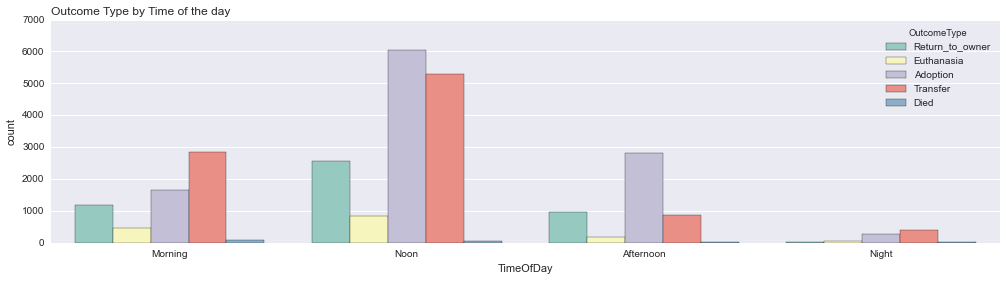

In [33]:
sns.set(font_scale=1)
fig = plt.gcf()
fig.set_size_inches(17,4)
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.title('Outcome Type by Time of the day', loc='left')
sns.countplot(x = 'TimeOfDay', data=train, hue='OutcomeType', palette='Set3', order=['Morning', 'Noon', 'Afternoon', 'Night'])
plt.show()

In [ ]:
train = train.drop('hour', axis=1)

# Age in days upon outcome

Age is given in years, months ets. in order to normalize the variable it is transformed to age in days upon outcome

In [ ]:
AgeuponOutcomeDays = list()

AgeuponOutcomeDays = list()
for i in range(train.shape[0]):
    if type(train['AgeuponOutcome'][i]) == float:
        AgeuponOutcomeDays.append(1)
    else:
        if 'year' in train['AgeuponOutcome'][i]:
            if train['AgeuponOutcome'][i][1] == ' ':
                AgeuponOutcomeDays.append(int(train['AgeuponOutcome'][i][0]) * 365)
            else: 
                AgeuponOutcomeDays.append(int(train['AgeuponOutcome'][i][0] + train['AgeuponOutcome'][i][1]) * 365)
        elif 'month' in train['AgeuponOutcome'][i]:
            if train['AgeuponOutcome'][i][1] == ' ':
                AgeuponOutcomeDays.append(int(train['AgeuponOutcome'][i][0]) * 30)
            else: 
                AgeuponOutcomeDays.append(int(train['AgeuponOutcome'][i][0] + train['AgeuponOutcome'][i][1]) * 30)
        elif 'week' in train['AgeuponOutcome'][i]:
            if train['AgeuponOutcome'][i][1] == ' ':
                AgeuponOutcomeDays.append(int(train['AgeuponOutcome'][i][0]) * 7)
            else: 
                AgeuponOutcomeDays.append(int(train['AgeuponOutcome'][i][0] + train['AgeuponOutcome'][i][1]) * 7)
        elif 'day' in train['AgeuponOutcome'][i]:
            if train['AgeuponOutcome'][i][1] == ' ':
                AgeuponOutcomeDays.append(int(train['AgeuponOutcome'][i][0]))
            else: 
                AgeuponOutcomeDays.append(int(train['AgeuponOutcome'][i][0] + train['AgeuponOutcome'][i][1]))

train['AgeuponOutcomeDays'] = AgeuponOutcomeDays

In [ ]:
train = train.drop('AgeuponOutcome', axis=1)

## Create age groups

### Dogs ages and stages:

* New Born – 0-6 months
* Junior – 6 months-18 months
* Prime – 18 months - 3 years
* Mature – 3-6 years
* Senior - 6-10 years
* Geriatric - 10 and above 

[Dog ages and stages](http://dogtime.com/dog-health/dog-ages-and-dog-stages/253-ages-stages#oEv0plE2gUujitRW.99)

### Cats ages and stages:

* New Born – 0-6 months
* Junior – 6 months-2 years
* Prime – 3-6 years
* Mature – 7-10 years
* Senior - 11-14 years
* Geriatric - 15 years and above

[Cats ages and stages](http://icatcare.org/advice/life-stages)


In [ ]:
AgeGroup = list()
for i in range(train.shape[0]):
    if train.AnimalType[i] == 'Dog':
        if train.AgeuponOutcomeDays[i] <= 6*30:
            AgeGroup.append('NewBorn')
        if train.AgeuponOutcomeDays[i] > 6*30 and train.AgeuponOutcomeDays[i] <= 18*30:
            AgeGroup.append('Junior')
        if train.AgeuponOutcomeDays[i] > 18*30 and train.AgeuponOutcomeDays[i] <= 3*365:
            AgeGroup.append('Prime')
        if train.AgeuponOutcomeDays[i] > 3*365 and train.AgeuponOutcomeDays[i] <= 6*365:
            AgeGroup.append('Mature')
        if train.AgeuponOutcomeDays[i] > 6*365 and train.AgeuponOutcomeDays[i] <= 10*365:
            AgeGroup.append('Senior')
        if train.AgeuponOutcomeDays[i] > 10*365:
            AgeGroup.append('Geriatric')

    else:
        if train.AgeuponOutcomeDays[i] <= 180:
            AgeGroup.append('NewBorn')
        if train.AgeuponOutcomeDays[i] > 180 and train.AgeuponOutcomeDays[i] <= 730:
            AgeGroup.append('Junior')
        if train.AgeuponOutcomeDays[i] > 730 and train.AgeuponOutcomeDays[i] <= 2190:
            AgeGroup.append('Prime')
        if train.AgeuponOutcomeDays[i] > 2190 and train.AgeuponOutcomeDays[i] <= 3650:
            AgeGroup.append('Mature')
        if train.AgeuponOutcomeDays[i] > 3650 and train.AgeuponOutcomeDays[i] <= 5110:
            AgeGroup.append('Senior')
        if train.AgeuponOutcomeDays[i] > 5110:
            AgeGroup.append('Geriatric')

train['AgeGroup'] = AgeGroup

In [ ]:
sns.set(font_scale=1.8)
ax = sns.countplot('AnimalType', hue = 'AgeGroup', data = train, palette='Set3',
                   hue_order=['NewBorn', 'Junior', 'Prime', 'Mature', 'Senior', 'Geriatric'])
fig = plt.gcf()
fig.set_size_inches(17,5)
plt.xlabel('')
plt.ylabel('')
plt.title('Age Group by Animal Type', loc='left', fontsize=20)
plt.ylim(top = 8000)
plt.legend(fontsize=15, loc=0)
fig = plt.gcf()
fig.set_size_inches(17,5)

for p in ax.patches[::2]:
    ncount = len(train[(train.AnimalType == 'Dog')])
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

for p in ax.patches[1::2]:
    ncount = len(train[(train.AnimalType == 'Cat')])
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')
    
plt.show()

# Create a Sex var and a Fertile var

### Fertile I/O

In [ ]:
fertile = list()
for i in range(train.shape[0]):
    if type(train['SexuponOutcome'][i]) == float:
        fertile.append('Not Fertile')
    else:
        if 'Neutered' in train.SexuponOutcome[i] or 'Spayed' in train.SexuponOutcome[i]:
            fertile.append('Not Fertile')
        else:
            fertile.append('Fertile')

### Male / Female

In [ ]:
Sex = list()
for i in range(train.shape[0]):
    if type(train['SexuponOutcome'][i]) == float:
        Sex.append('Male')
    else:
        if 'Female' in train.SexuponOutcome[i]:
            Sex.append('Female')
        else:
            Sex.append('Male')

In [ ]:
train['Fertile'] = fertile
train['Sex'] = Sex
train = train.drop('SexuponOutcome', axis=1)

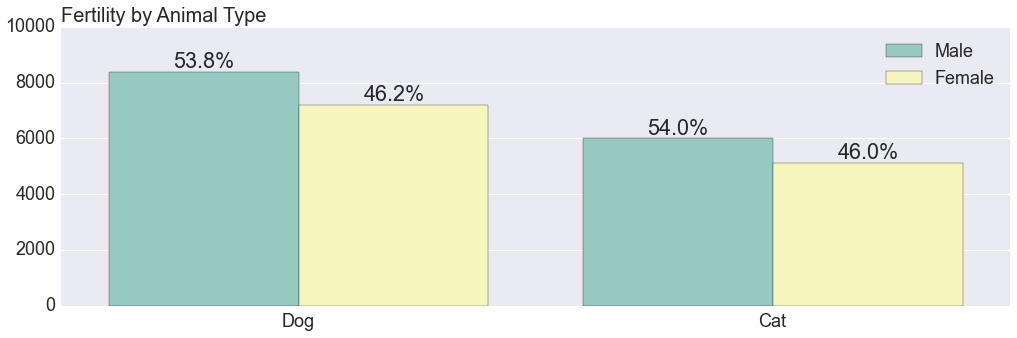

In [35]:
sns.set(font_scale=1.8)
ax = sns.countplot('AnimalType', hue = 'Sex', data = train[(train.AnimalType != 'nan')], palette='Set3')
fig = plt.gcf()
fig.set_size_inches(17,5)
plt.xlabel('')
plt.ylabel('')
plt.title('Fertility by Animal Type', loc='left', fontsize=20)
plt.ylim(top = 10000)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(17,5)

for p in ax.patches[::2]:
        ncount = len(train[(train.AnimalType == 'Dog')])
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

for p in ax.patches[1::2]:
        ncount = len(train[(train.AnimalType == 'Cat')])
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')
        

    
plt.show()

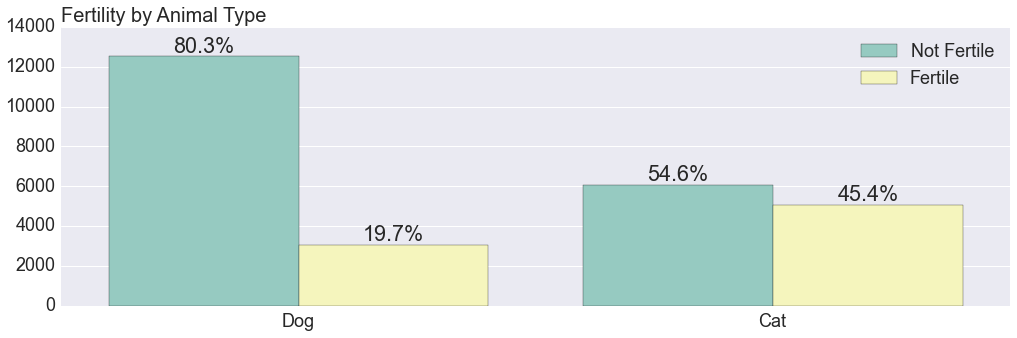

In [36]:
sns.set(font_scale=1.8)
ax = sns.countplot('AnimalType', hue = 'Fertile', data = train[(train.AnimalType != 'nan')], palette='Set3')
fig = plt.gcf()
fig.set_size_inches(17,5)
plt.xlabel('')
plt.ylabel('')
plt.title('Fertility by Animal Type', loc='left', fontsize=20)
plt.ylim()
plt.legend()
fig = plt.gcf()
fig.set_size_inches(17,5)

for p in ax.patches[::2]:
        ncount = len(train[(train.AnimalType == 'Dog')])
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

for p in ax.patches[1::2]:
        ncount = len(train[(train.AnimalType == 'Cat')])
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')
        

    
plt.show()

# The name var 

check for the most popular name in cats and dogs

In [38]:
names_df = train[(train.Name.isnull() == False)]
dog_names = list()
cat_names = list()
names_df.index = range(0,len(names_df))

for i in range(names_df.shape[0]):
    if names_df.AnimalType[i] == 'Dog':
        dog_names.append(names_df.Name[i])
    else:
        cat_names.append(names_df.Name[i])

In [39]:
from collections import Counter

count_dog = Counter(dog_names)
count_dog_df = pd.DataFrame(count_dog.most_common(15), columns=['name' ,'count'])
count_cat = Counter(cat_names)
count_cat_df = pd.DataFrame(count_cat.most_common(15), columns=['name' ,'count'])

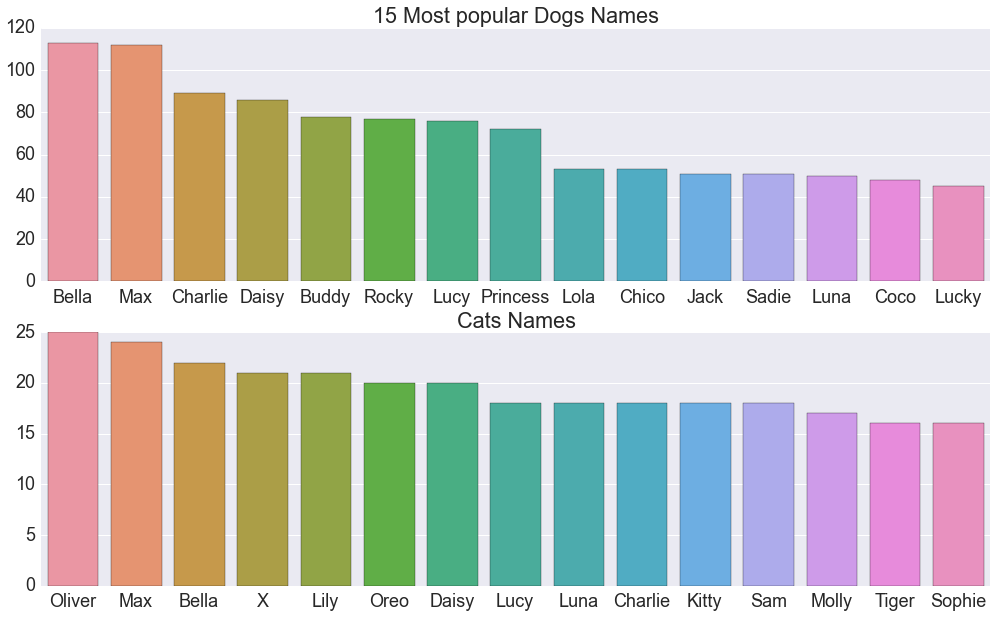

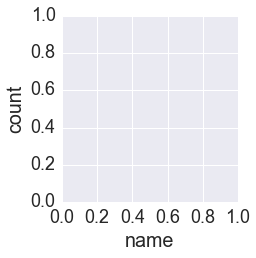

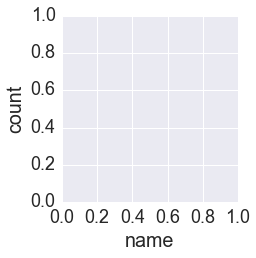

In [40]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False,
                                            squeeze=True, subplot_kw=None, gridspec_kw=None)

fig = plt.gcf()

sns.factorplot(x = 'name', y = 'count',kind = 'bar', data = count_dog_df, ax=ax1)
sns.factorplot(x = 'name', y = 'count', data = count_cat_df, kind="bar", ax=ax2)

ax1.set_ylabel(' ')
ax2.set_ylabel(' ')
ax1.set_xlabel('\n')
ax2.set_xlabel(' ')


ax1.set_title('15 Most popular Dogs Names')
ax2.set_title('\n''Cats Names')

fig.set_size_inches(17,10)

plt.show()

### Named I/O

In [42]:
Named = list()
for i in range(train.shape[0]):
    if type(train['Name'][i]) == float:
        Named.append('Unnamed')
    else:
        if train.Name.isnull()[i] == True:
            Named.append('Unnamed')
        else:
            Named.append('Named')

In [43]:
train['Named'] = Named

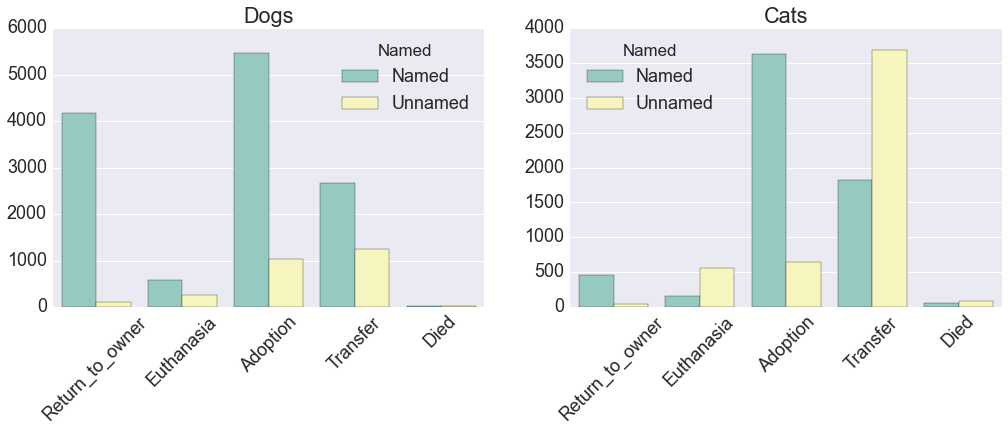

In [44]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,
                                            squeeze=True, subplot_kw=None, gridspec_kw=None)
sns.set(font_scale=1.8)

a = sns.countplot('OutcomeType', hue = 'Named', data = train[(train.AnimalType == 'Dog')], palette='Set3',
                  ax=ax1, order = ['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'])
b = sns.countplot('OutcomeType', hue = 'Named', data = train[(train.AnimalType == 'Cat')], palette='Set3',
                  ax=ax2, order = ['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'])

a.set_title('Dogs')
b.set_title('Cats')

a.set(ylabel='', xlabel='')
b.set(ylabel='', xlabel='')

for item in b.get_xticklabels():
    item.set_rotation(45)

for item in a.get_xticklabels():
    item.set_rotation(45)

fig = plt.gcf()
fig.set_size_inches(17,5)
    
plt.show()

# Breed variable 

### form a word cloud in order to explore the breed variable and decide how to treat it

In [45]:
train_dogs = train[(train.AnimalType == "Dog")]
train_dogs.index = range(len(train_dogs))
breed_words_dog = ''
for i in range(train_dogs.shape[0]):
    for j in range(len(str.split(train_dogs.Breed[i]))):
        breed_words_dog +=' ' + (str.split(train_dogs.Breed[i])[j])

### Generate the Word cloud for words in Dog Breeds

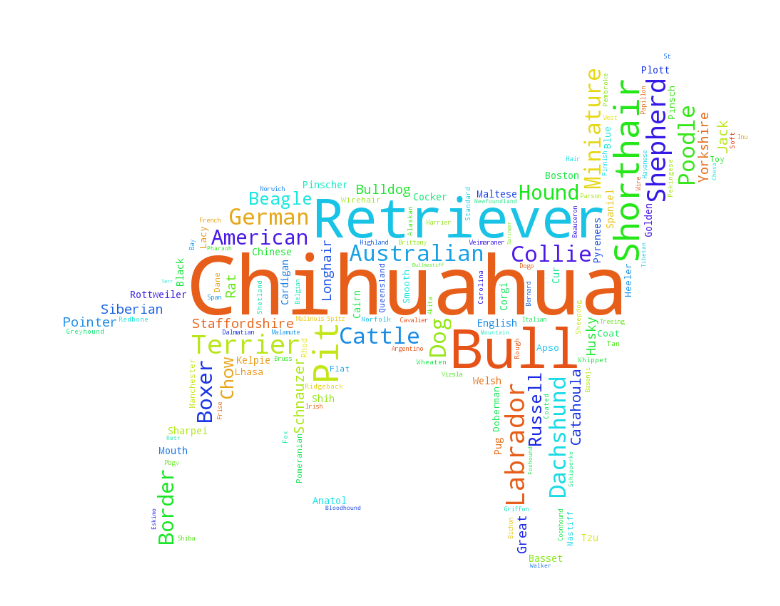

In [46]:
from scipy.misc import imread
dog_mask = imread(path.join("dog-silhouette-australian-cattledog.jpg"))

wcloud = WordCloud(font_path=None, width=800, height=400, margin=5, ranks_only=None,
                   prefer_horizontal=0.5, mask=dog_mask, scale=1, max_words=150, min_font_size=6,
                   stopwords=None, random_state=None, background_color='white', max_font_size=None,
                   font_step=1, mode='RGB', relative_scaling=0).generate(breed_words_dog)

plt.imshow(wcloud)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.axis("off")
plt.show()

### Counting how many times each unique word appears in 'Breed'

In [47]:
breeds_df = train[(train.Breed.isnull() == False)]
dog_breeds = list()
cat_breeds = list()

for i in range(breeds_df.shape[0]):
    if breeds_df.AnimalType[i] == 'Dog':
        dog_breeds.append(breeds_df.Breed[i])
    else:
        cat_breeds.append(breeds_df.Breed[i])

In [48]:
count_dog = Counter(dog_breeds)
count_dog_df = pd.DataFrame(count_dog.most_common(15), columns=['Breed' ,'count'])
count_cat = Counter(cat_breeds)
count_cat_df = pd.DataFrame(count_cat.most_common(15), columns=['Breed' ,'count'])

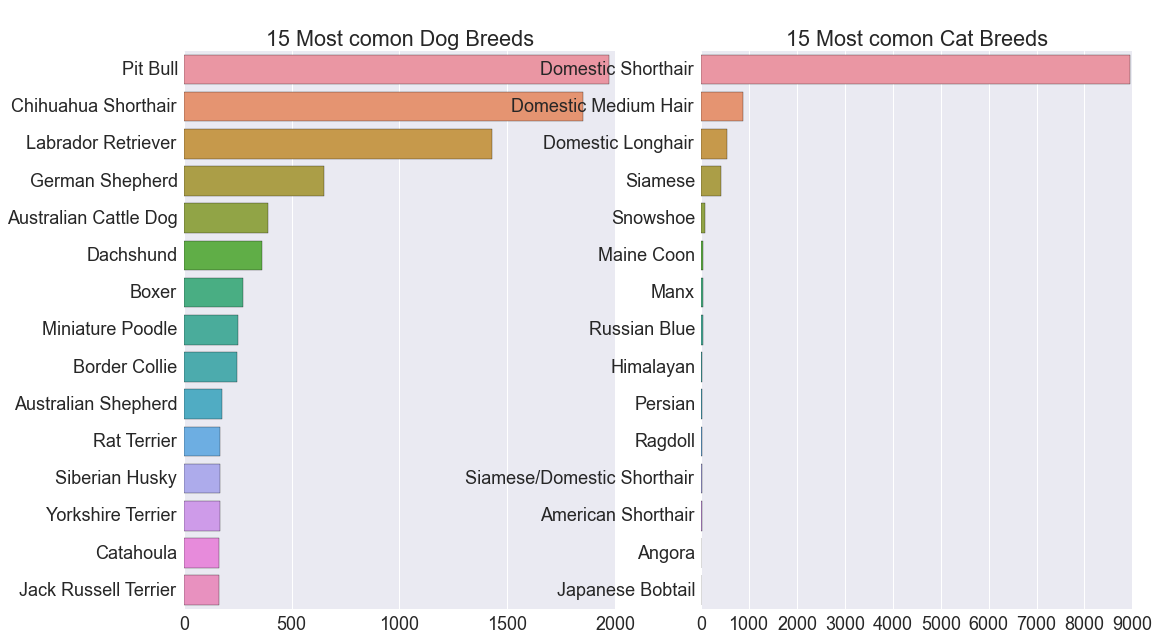

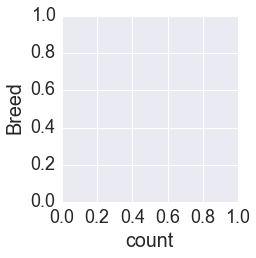

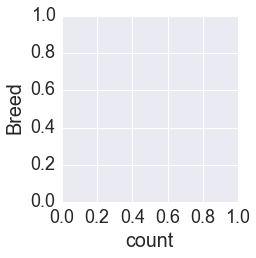

In [49]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

fig = plt.gcf()
fig.set_size_inches(17,10)

a = sns.factorplot(y = 'Breed', x = 'count',kind = 'bar', data = count_dog_df, ax=ax1)
b = sns.factorplot(y = 'Breed', x = 'count', data = count_cat_df, kind="bar", ax=ax2)

ax1.set_ylabel(' ')
ax2.set_ylabel(' ')
ax1.set_xlabel('\n')
ax2.set_xlabel(' ')

ax1.set_title('15 Most comon Dog Breeds')
ax2.set_title('\n''15 Most comon Cat Breeds')


plt.show()

### Create a Mix Var

In [ ]:
Mix = list()
for i in range(train.shape[0]):
    if 'Mix' in train.Breed[i]:
        Mix.append(1)
    elif '/' in train.Breed[i]:
         Mix.append(1)
    else:
        Mix.append(0)

train['Mix'] = Mix

Breed = []
for i in range(train.shape[0]):
    if 'Mix' in train.Breed[i]:
        Breed.append(train.Breed[i][:len(train.Breed[i])-4:])
    else:
        Breed.append(train.Breed[i])

In [ ]:
train.Breed = Breed

### Import a breed weight table

In [50]:
weight = pd.read_csv('http://static.brighterplanet.com/science/data/consumables/pets/breed_genders.csv')

In [51]:
weight = weight.drop('(in lbs)', axis=1)

In [52]:
gender = []
for i in range(weight.shape[0]):
    if weight.gender.isnull()[i] == True:
        gender.append('Both')
    else:
        gender.append(weight.gender[i])

In [53]:
weight.gender = gender

### Weight box plot

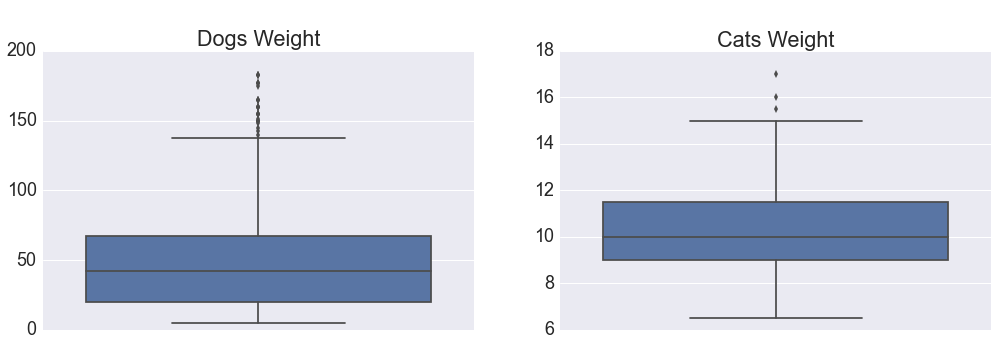

In [54]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

fig = plt.gcf()
fig.set_size_inches(17,5)

sns.boxplot(y = 'weight', data = weight[weight.species == 'dog'], ax=ax1)
sns.boxplot(y = 'weight', data = weight[weight.species == 'cat'], ax=ax2)

ax1.set_ylabel(' ')
ax2.set_ylabel(' ')
ax1.set_xlabel('\n')
ax2.set_xlabel(' ')

ax1.set_title('Dogs Weight')
ax2.set_title('\n''Cats Weight')



plt.show()

In [ ]:
t_breed = train.Breed
w_name = weight.name

In [ ]:
Weight_col = [None] * train.shape[0]
for i in range(len(train.Breed)):
    for j in range(len(weight.name)):
        if 'Pit' in train.Breed[i]:
            Weight_col[i] = 63.5
            break
        if weight.name[j] in train.Breed[i]:
            Weight_col[i] = weight.weight[j] 
            break

### Intelligence  Var

data from: http://petrix.com/dogint/intelligence.html

In [ ]:
intil = [['Border Collie', 'Poodle', 'German Shepherd', 'Golden Retriever', 'Doberman',
'Shetland Sheepdog', 'Labrador Retriever', 'Papillon', 'Rottweiler', 'Australian Cattle Dog'],
['Pembroke Welsh Corgi', 'Miniature Schnauzer', 'English Springer Spaniel', 'Belgian Tervuren', 'Schipperke',
'Belgian Sheepdog', 'Collie', 'Keeshond', 'German Shorthaired Pointer', 'Flat-Coated Retriever',
'English Cocker Spaniel', 'Standard Schnauzer', 'Brittany', 'Cocker Spaniel', 'Weimaraner', 'Belgian Malinois',
'Bernese Mountain Dog', 'Pomeranian', 'Irish Water Spaniel', 'Vizsla', 'Cardigan Welsh Corgi'],
['Chesapeake Bay Retriever', 'Puli', 'Yorkshire Terrier', 'Giant Schnauzer', 'Airedale Terrier',
'Bouvier Des Flandres', 'Border Terrier', 'Briard', 'Welsh Springer Spaniel', 'Manchester Terrier',
'Samoyed', 'Field Spaniel', 'Newfoundland', 'Australian Terrier', 'American Staffordshire Terrier',
'Gordon Setter', 'Bearded Collie', 'Cairn Terrier', 'Kerry Blue Terrier', 'Irish Setter', 'Norwegian Elkhound',
'Affenpincher', 'Silky Terrier', 'Miniature Pinscher', 'English Setter', 'Pharaoh Hound', 'Clumber Spaniel',
'Norwich Terrier', 'Dalmatian'],
['Soft-Coated Wheaten Terrier', 'Bedlington Terrier', 'Smooth Fox Terrier', 'Curly-Coated Retriever',
'Irish Wolfhound','Kuvasz','Australian Shepherd','Saluki','Finnish Spitz','Pointer','Cavalier King Charles Spaniel',
'German Wirehaired Pointer', 'Coonhound', 'American Water Spaniel', 'Siberian Husky', 'Bichon Frise',
'English Toy Spaniel', 'Tibetan Spaniel', 'English Foxhound', 'Otterhound', 'American Foxhound', 'Greyhound',
'Wirehaired Pointing Griffon', 'West Highland White Terrier', 'Scottish Deerhound', 'Boxer', 'Great Dane',
'Dachshund', 'Stafforshire Bull Terrier', 'Alaskan Malamute', 'Whippet', 'Chinese Shar-pei', 'Wire Fox Terrier',
'Rhodesian Ridgeback', 'Ibizan Hound', 'Welsh Terrier', 'Irish Terrier', 'Boston Terrier', 'Akita'],
['Skye Terrier', 'Norfolk Terrier', 'Sealyham Terrier', 'Pug', 'French Bulldog', 'Brussels Griffon',
'Maltese', 'Italian Greyhound', 'Chinese Crested', 'Dandie Dinmont Terrier', 'Petit Basset Griffon Vendeen',
'Tibetan Terrier', 'Japanese Chin', 'Lakeland Terrier', 'Old English Sheepdog', 'Great Pyrenees',
'Scottish Terrier', 'Saint Bernard', 'Bull Terrier', 'Chihuahua', 'Lhasa Apso', 'Bullmastiff'],
['Shih Tzu', 'Basset Hound', 'Mastiff', 'Beagle', 'Pekingese', 'Bloodhound', 'Borzoi', 'Chow Chow',
'Bulldog', 'Basenji', 'Afghan Hound']]

In [ ]:
Intelligence = [None] * train.shape[0]
for i in range(len(train.Breed)):
    for j in range(len(intil)):
        for k in range(len(intil[j])):
            if intil[j][k] in train.Breed[i]:
                Intelligence[i] = j+1
                break

##### Pit Bull Intelligence
https://www.vetarena.org/encyclopedia-dog-breeds/12/american-pitbull-terrier.html

In [ ]:
for i in range(train.shape[0]):
    if train.Breed[i] == 'Pit Bull':
        train.Intelligence[i] = 2.

##### Rat Terrier Intelligence

http://dogtime.com/dog-breeds/rat-terrier

In [ ]:
for i in range(train.shape[0]):
    if train.Breed[i] == 'Rat Terrier':
        train.Intelligence[i] = 2.

In [ ]:
for i in range(train.shape[0]):
    if train.Intelligence.isnull()[i]:
        train.Intelligence[i] = 3

# Creating Breed groups instead of Breeds

In [ ]:
Groups = {'Working': 
         ['Alaskan Malamute', 'Bernese Mountain', 'Bouvier Des Flandres', 'Boxer', 'Bullmastiff', 'Canadian Eskimo', 'Dobermann',
'Dogue de Bordeaux', 'Entlebucher Mountain', 'Pinscher', 'Giant', 'Great Dane', 'Greater Swiss Mountain', 'Greenland',
'Hovawart', 'Leonberger', 'Mastiff', 'Newfoundland', 'Rottweiler', 'Siberian Husky', 'St. Bernard', 'Working'],
'PitBull': ['Pit Bull', 'Pit'],
'Utility': 
         ['Akita', 'Bulldog', 'Canaan', 'Chow Chow', 'Dalmatian', 'Eurasier', 'Spitz', 'Keeshond', 'Kooikerhondje',
'Jindo', 'Lhasa Apso', 'Poodle', 'Schipperke', 'Schnauzer', 'Shar Pei', 'Shih Tzu', 'Xoloitzcuintle', 'Utility'],
'Toy': 
         ['Affenpinscher', 'Bichon Frise', 'Bolognese', 'King Charles', 'Chihuahua', 'Crested', 'Coton De Tulear',
'Toy', 'Griffon Bruxellois', 'Havanese', 'Greyhound', 'Japanese Chin', 'Lowchen', 'Maltese', 'Pinscher',
'Papillon', 'Pekingese', 'Pomeranian', 'Pug'],
'Terrier': ['Terrier'],
'Pastoral': 
         ['Cattle', 'Beauceron', 'Shepherd', 'Bergamasco', 'Collie', 'Briard', 'Estrela Mountain', 
'Lapphund', 'Kuvasz', 'Puli', 'Pumi', 'Komondor', 'Lancashire Heeler', 'Buhund', 'Sheepdog', 
'Pyrenean Mountain', 'Samoyed','Lapphund', 'Vallhund', 'Turkish Kangal', 'Welsh Corgi'],
'Gundog': 
         ['Bracco', 'Braque', 'Brittany', 'Setter', 'Vizsla', 'Spinone', 'Korthals Griffon', 'Lagotto Romagnolo', 
'Large Munsterlander', 'Pointer', 'Retriever', 'Small Munsterlander', 'Spaniel', 'Water', 'Weimaraner'], 
'Hound': 
         ['Hound', 'Azawakh', 'Basenji', 'Basset Bleu De Gascogne', 'Basset Fauve De Bretagne', 'Basset Griffon Vendeen',
'Basset Hound', 'Bavarian Mountain Hound', 'Beagle', 'Bloodhound', 'Borzoi', 'Cirneco', 'Dachshund', 'Dachshund',
'Dachshund', 'Deerhound', 'Finnish Spitz', 'Foxhound', 'Grand Bleu De Gascogne', 'Greyhound', 'Griffon Fauve De Bretagne',
'Hamiltonstovare', 'Ibizan Hound', 'Wolfhound', 'Elkhound', 'Otterhound', 'Pharaoh Hound', 'Podengo', 
'Rhodesian Ridgeback', 'Saluki', 'Segugio', 'Sloughi', 'Whippet']}

In [ ]:
import re

def search (values, searchFor):
    for k in values:
        for v in values[k]:
            if searchFor in v:
                return k
    return None

In [ ]:
Group = [None] * train.shape[0]

for i in range(train.shape[0]):
    for word in re.split('/| ', train.Breed[i]): 
        Group[i] = search(Groups, word)
        if  Group[i] != None:
            break

In [ ]:
train['Group'] = Group

# Adoption Rates for different Groups

### Create a Dog train DF

In [89]:
train_dog = train[train.AnimalType == 'Dog']

In [90]:
groups = train.Group.unique()

In [91]:
def adop_rate(group):
    total = 0.0
    adop = 0.0
    for i in range(train.shape[0]):
        if train.Group[i] == group:
            total += 1
            if train.OutcomeType[i] == 'Adoption':
                adop += 1
    return '%.2f'%(adop/total)

In [95]:
groups = [x for x in groups if str(x) != 'nan']

In [96]:
rate = []
for group in groups:
    rate.append(adop_rate(group))
    print 'The adoption rate of {group} is {rate}: '.format(group=group, rate=adop_rate(group))

The adoption rate of Pastoral is 0.47: 
The adoption rate of PitBull is 0.30: 
The adoption rate of Utility is 0.34: 
The adoption rate of Terrier is 0.44: 
The adoption rate of Working is 0.37: 
The adoption rate of Gundog is 0.44: 
The adoption rate of Hound is 0.46: 
The adoption rate of Toy is 0.44: 


### Adoption rate plot

In [98]:
groups_df = pd.DataFrame(groups, columns=['Group'])

In [99]:
groups_df['Rate'] = None
for i in range(groups_df.shape[0]):
    groups_df['Rate'][i] = adop_rate(groups_df.Group[i])

In [100]:
groups_df = groups_df.sort_values('Rate')

groups_df.Rate = groups_df.Rate.astype(float)

groups_df.index = range(groups_df.shape[0])

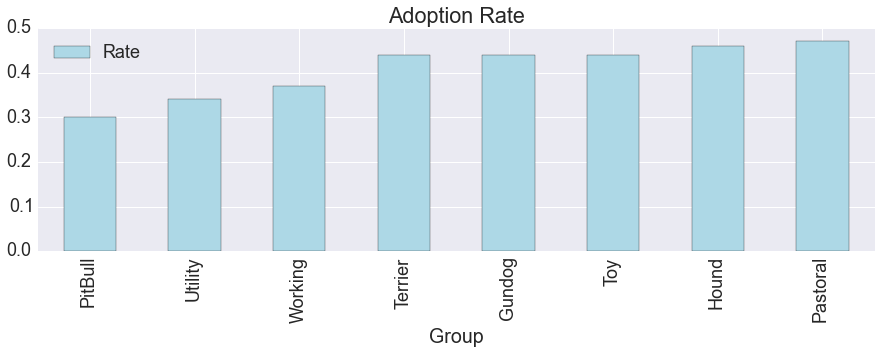

In [113]:
groups_df.plot(x='Group', y= 'Rate', title='Adoption Rate', figsize=[15,4], kind='bar', color='LightBlue')
plt.show()

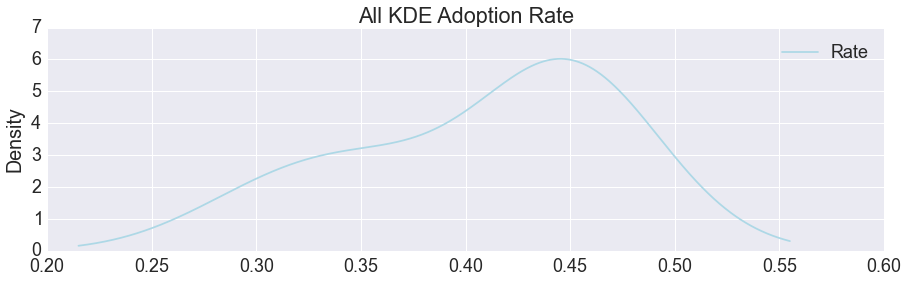

In [130]:
groups_df.plot(x='Group', y= 'Rate', title='All KDE Adoption Rate', figsize=[15,4], kind='kde', color='LightBlue')
plt.show()

### Generate the Word cloud for words in Cat Breeds

In [121]:
train_cats = train[(train.AnimalType == "Cat")]
train_cats.index = range(len(train_cats))
breed_words_cat = ''
for i in range(train_cats.shape[0]):
    for j in range(len(str.split(train_cats.Breed[i]))):
        breed_words_cat +=' ' + (str.split(train_cats.Breed[i])[j])

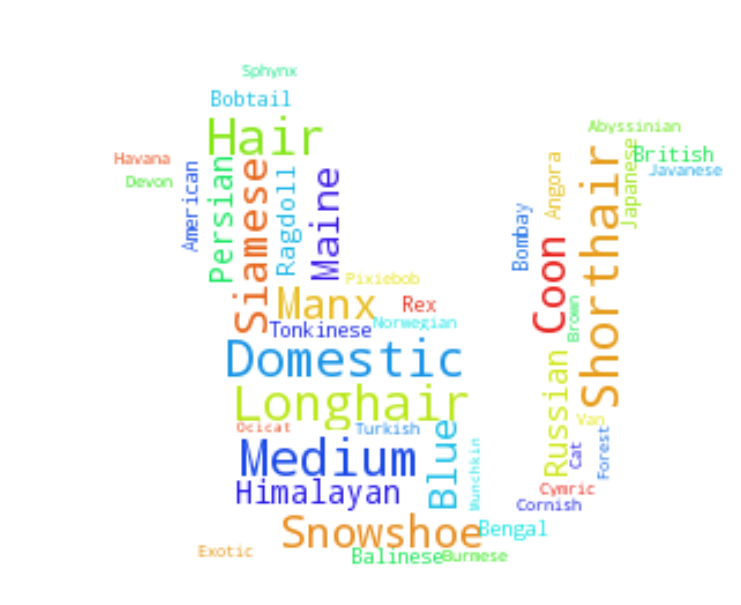

In [122]:
cat_mask = imread(path.join("cat-sil.jpg"))

wcloud = WordCloud(font_path=None, width=800, height=400, margin=1, ranks_only=None,
                   prefer_horizontal=0.8, mask=cat_mask, scale=1, max_words=250, min_font_size=4,
                   stopwords=None, random_state=None, background_color='white', max_font_size=None,
                   font_step=1, mode='RGB', relative_scaling=0).generate(breed_words_cat)

plt.imshow(wcloud)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.axis("off")
plt.show()